# Classification
## To classify the volatility into categories (high, medium, low)

In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, balanced_accuracy_score
from sklearn.impute import SimpleImputer

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



In [98]:
# Import data from csv file
df = pd.read_csv('/Users/jeanstibel/Documents/AI Classes/Projects/02 Project/Project 02/Resources/df_top_10.csv')
df.head()

,date,crypto_id,open,close,high,low,volume,number_of_trades,diff_oc,return,volatility,vol_change,ma_5,ma_10,price_movement
0,2020-09-22,AVAX,0.8500,5.3193,7.0000,0.8500,31441883.16,375884,4.4693,525.800000,723.529412,0.000000,0.00000,0.0,1
1,2020-09-23,AVAX,5.3279,3.5350,5.3600,3.4000,12620608.01,168336,-1.7929,-33.651157,36.787477,-59.860521,0.00000,0.0,0
2,2020-09-24,AVAX,3.5305,4.6411,4.8873,3.4033,7107843.86,104806,1.1106,31.457301,42.033706,-43.680654,0.00000,0.0,1
3,2020-09-25,AVAX,4.6366,4.7134,5.0234,4.2001,3886096.71,78381,0.0768,1.656386,17.756546,-45.326645,0.00000,0.0,1
4,2020-09-26,AVAX,4.7164,4.5200,4.8200,4.3294,1814932.97,34016,-0.1964,-4.164193,10.402002,-53.296763,4.54576,0.0,0


In [99]:
# check for missing values
df.isnull().sum()

date                0
crypto_id           0
open                0
close               0
high                0
low                 0
volume              0
number_of_trades    0
diff_oc             0
return              0
volatility          0
vol_change          0
ma_5                0
ma_10               0
price_movement      0
dtype: int64

In [ ]:
# Create Label to categorize volatility into Low, Medium, High using quantiles
volatility_labels = pd.qcut(df['volatility'], q=3, labels=[0, 1, 2])
df['volatility_class'] = volatility_labels
df.head()

,date,crypto_id,open,close,high,low,volume,number_of_trades,diff_oc,return,volatility,vol_change,ma_5,ma_10,price_movement,volatility_class
0,2020-09-22,AVAX,0.8500,5.3193,7.0000,0.8500,31441883.16,375884,4.4693,525.800000,723.529412,0.000000,0.00000,0.0,1,2
1,2020-09-23,AVAX,5.3279,3.5350,5.3600,3.4000,12620608.01,168336,-1.7929,-33.651157,36.787477,-59.860521,0.00000,0.0,0,2
2,2020-09-24,AVAX,3.5305,4.6411,4.8873,3.4033,7107843.86,104806,1.1106,31.457301,42.033706,-43.680654,0.00000,0.0,1,2
3,2020-09-25,AVAX,4.6366,4.7134,5.0234,4.2001,3886096.71,78381,0.0768,1.656386,17.756546,-45.326645,0.00000,0.0,1,2
4,2020-09-26,AVAX,4.7164,4.5200,4.8200,4.3294,1814932.97,34016,-0.1964,-4.164193,10.402002,-53.296763,4.54576,0.0,0,2


The pd.qcut function from the pandas library is used to discretize or bin continuous data into equal-sized bins based on quantiles. It is particularly useful for creating categorical variables from continuous variables by dividing the data into quantiles.

In [101]:
# Create features for volatility
features = ['volatility', 'return', 'volume', 'diff_oc', 'ma_5', 'ma_10']
features_df = df[features + ['volatility_class']].copy()

In [102]:
# Define target and features
target = 'volatility_class'
features = [col for col in features_df.columns if col != target]

In [103]:
X = features_df[features]
y = features_df[target]

In [104]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [105]:
'''
from sklearn.linear_model import LogisticRegression
# Create a `LogisticRegression` function and assign it
# to a variable named `logistic_regression_model`.
logistic_regression_model = LogisticRegression()
# Fit the model
logistic_regression_model.fit(X_train_scaled, y_train)
# Score the model
print(f"LogisticRegression - Training Data Score: {logistic_regression_model.score(X_train_scaled, y_train)}")
print(f"LogisticRegression - Testing Data Score: {logistic_regression_model.score(X_test_scaled, y_test)}")

from sklearn.neighbors import KNeighborsClassifier
# Create a `KNeighborsClassifier` function and assign it
# to a variable named `knn_model`.
knn_model = KNeighborsClassifier(n_neighbors=1)
# Fit the model
knn_model.fit(X_train_scaled, y_train)
# Score the model
print(f"KNeighborsClassifier - Training Data Score: {knn_model.score(X_train_scaled, y_train)}")
print(f"KNeighborsClassifier - Testing Data Score: {knn_model.score(X_test_scaled, y_test)}")

from sklearn import tree
# Create a `DecisionTreeClassifier` function and assign it
# to a variable named `tree_model`.
tree_model = tree.DecisionTreeClassifier()
# Fit the model
tree_model.fit(X_train_scaled, y_train)
# Score the model
print(f"DecisionTreeClassifier - Training Data Score: {tree_model.score(X_train_scaled, y_train)}")
print(f"DecisionTreeClassifier - Testing Data Score: {tree_model.score(X_test_scaled, y_test)}")

from sklearn.ensemble import RandomForestClassifier
# Create a `RandomForestClassifier` function and assign it
# to a variable named `random_forest_model`.
random_forest_model = RandomForestClassifier(n_estimators=128)
# Fit the model
random_forest_model.fit(X_train_scaled, y_train)
# Score the model
print(f"RandomForestClassifier - Training Data Score: {random_forest_model.score(X_train_scaled, y_train)}")
print(f"RandomForestClassifier - Testing Data Score: {random_forest_model.score(X_test_scaled, y_test)}")

from sklearn.ensemble import ExtraTreesClassifier
# Create a `ExtraTreesClassifier` function and assign it
# to a variable named `extra_trees_model`.
extra_trees_model = ExtraTreesClassifier(n_estimators=128)
# Fit the model
extra_trees_model.fit(X_train_scaled, y_train)
# Score the model
print(f"ExtraTreesClassifier - Training Data Score: {extra_trees_model.score(X_train_scaled, y_train)}")
print(f"ExtraTreesClassifier - Testing Data Score: {extra_trees_model.score(X_test_scaled, y_test)}")

from sklearn.ensemble import GradientBoostingClassifier
# Create a `GradientBoostingClassifier` function and assign it
# to a variable named `gradient_boosting_model`.
gradient_boosting_model = GradientBoostingClassifier(n_estimators=128)
# Fit the model
gradient_boosting_model.fit(X_train_scaled, y_train)
# Score the model
print(f"GradientBoostingClassifier - Training Data Score: {gradient_boosting_model.score(X_train_scaled, y_train)}")
print(f"GradientBoostingClassifier - Testing Data Score: {gradient_boosting_model.score(X_test_scaled, y_test)}")

from sklearn.ensemble import AdaBoostClassifier
# Create a `AdaBoostClassifier` function and assign it
# to a variable named `adaboost_model`.
adaboost_model = AdaBoostClassifier(n_estimators=128)
# Fit the model
adaboost_model.fit(X_train_scaled, y_train)
# Score the model
print(f"AdaBoostClassifier - Training Data Score: {adaboost_model.score(X_train_scaled, y_train)}")
print(f"AdaBoostClassifier - Testing Data Score: {adaboost_model.score(X_test_scaled, y_test)}")

from sklearn.ensemble import BaggingClassifier
# Create a `BaggingClassifier` function and assign it
# to a variable named `bagging_model`.
bagging_model = BaggingClassifier(n_estimators=128)
# Fit the model
bagging_model.fit(X_train_scaled, y_train)
# Score the model
print(f"BaggingClassifier - Training Data Score: {bagging_model.score(X_train_scaled, y_train)}")
print(f"BaggingClassifier - Testing Data Score: {bagging_model.score(X_test_scaled, y_test)}")

from sklearn.svm import SVC
# Create a `SVC` function and assign it
# to a variable named `svc_model`.
svc_model = SVC()
# Fit the model
svc_model.fit(X_train_scaled, y_train)
# Score the model
print(f"SVC - Training Data Score: {svc_model.score(X_train_scaled, y_train)}")
print(f"SVC - Testing Data Score: {svc_model.score(X_test_scaled, y_test)}")
'''

'\nfrom sklearn.linear_model import LogisticRegression\n# Create a `LogisticRegression` function and assign it\n# to a variable named `logistic_regression_model`.\nlogistic_regression_model = LogisticRegression()\n# Fit the model\nlogistic_regression_model.fit(X_train_scaled, y_train)\n# Score the model\nprint(f"LogisticRegression - Training Data Score: {logistic_regression_model.score(X_train_scaled, y_train)}")\nprint(f"LogisticRegression - Testing Data Score: {logistic_regression_model.score(X_test_scaled, y_test)}")\n\nfrom sklearn.neighbors import KNeighborsClassifier\n# Create a `KNeighborsClassifier` function and assign it\n# to a variable named `knn_model`.\nknn_model = KNeighborsClassifier(n_neighbors=1)\n# Fit the model\nknn_model.fit(X_train_scaled, y_train)\n# Score the model\nprint(f"KNeighborsClassifier - Training Data Score: {knn_model.score(X_train_scaled, y_train)}")\nprint(f"KNeighborsClassifier - Testing Data Score: {knn_model.score(X_test_scaled, y_test)}")\n\nfrom 

In [106]:
def classification_models(X_train_scaled, y_train, X_test_scaled, y_test):
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
        'Random Forest': RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42),
        'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=5),
        'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=5, random_state=42),
        'RandomForestClassifier': RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
        'ExtraTreesClassifier': ExtraTreesClassifier(n_estimators=100, max_depth=5, random_state=42),
        'GradientBoostingClassifier': GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=42),
        'AdaBoostClassifier': AdaBoostClassifier(n_estimators=100, random_state=42),
        'BaggingClassifier': BaggingClassifier(n_estimators=100, random_state=42),
        'SVC': SVC(kernel='linear', probability=True, random_state=42),
    }

    classification_results = {}
    for model_name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        class_report = classification_report(y_test, y_pred, output_dict=True)
        classification_results[model_name] = {
            'Accuracy': accuracy,
            'Classification Report': class_report
        }
       
        def plot_confusion_matrix(y_test, y_pred, model_name):
            cm = confusion_matrix(y_test, y_pred)
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
            plt.title(f'Confusion Matrix - {model_name}')
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.show()
        
    # Print all scores
    for model_name, results in classification_results.items():
        print(f"{model_name} - Accuracy: {results['Accuracy']}")
        
    # Plot confusion matrices    
    #for model_name, results in classification_results.items():
        #y_pred = model.predict(X_test_scaled)
        #plot_confusion_matrix(y_test, y_pred, model_name)
        



In [107]:
# Call the function
classification_results_df = classification_models(X_train_scaled, y_train, X_test_scaled, y_test)
classification_results_df

Logistic Regression - Accuracy: 0.9875419262098706
Random Forest - Accuracy: 0.9995208433157643
KNeighborsClassifier - Accuracy: 0.9691742533141671
DecisionTreeClassifier - Accuracy: 0.9998402811052548
RandomForestClassifier - Accuracy: 0.9995208433157643
ExtraTreesClassifier - Accuracy: 0.5812170579779588
GradientBoostingClassifier - Accuracy: 0.9998402811052548
AdaBoostClassifier - Accuracy: 0.9998402811052548
BaggingClassifier - Accuracy: 0.9998402811052548
SVC - Accuracy: 0.9939306819996806


In [108]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Define logistic_regression_model
logistic_regression_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_regression_model.fit(X_train_scaled, y_train)

# Create a function to perform cross-validation
def cross_validate_model(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, cv=cv)
    return scores.mean(), scores.std()

# Call the function with logistic_regression_model
mean_score, std_score = cross_validate_model(logistic_regression_model, X, y)
print(f"Mean Cross-Validation Score: {mean_score}")

# Print the standard deviation of the cross-validation scores
print(f"Standard Deviation of Cross-Validation Scores: {std_score}")



Mean Cross-Validation Score: 0.3331309904153355
Standard Deviation of Cross-Validation Scores: 0.0004318026609736588


In [117]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, balanced_accuracy_score

In [109]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Use the `roc_auc_score` function from `sklearn.metrics` to create a ROC AUC score # check notes below
# Create ROC AUC score
roc_auc = roc_auc_score(y_test, logistic_regression_model.predict_proba(X_test_scaled), multi_class='ovr')
# Print the ROC AUC score
print(f"ROC AUC Score: {roc_auc}")

# Create balanced accuracy score
balanced_accuracy = balanced_accuracy_score(y_test, logistic_regression_model.predict(X_test_scaled))
# Print the balanced accuracy score
print(f"Balanced Accuracy Score: {balanced_accuracy}")

# Create confusion matrix
cm = confusion_matrix(y_test, logistic_regression_model.predict(X_test_scaled))
# Print the confusion matrix
print(f"Confusion Matrix:\n{cm}")

# Create classification report
cr = classification_report(y_test, logistic_regression_model.predict(X_test_scaled))
# Print the classification report
print(f"Classification Report:\n{cr}")

ROC AUC Score: 0.9997676199080576
Balanced Accuracy Score: 0.9872739992229759
Confusion Matrix:
[[2133    1    0]
 [  18 2085    0]
 [   0   59 1965]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2134
           1       0.97      0.99      0.98      2103
           2       1.00      0.97      0.99      2024

    accuracy                           0.99      6261
   macro avg       0.99      0.99      0.99      6261
weighted avg       0.99      0.99      0.99      6261



### Notes
The ROC AUC score (Receiver Operating Characteristic - Area Under the Curve) is a performance measurement for classification problems at various threshold settings. It represents the degree or measure of separability achieved by the model. The ROC AUC score is used to evaluate how well the model distinguishes between classes. The ROC AUC score is then printed to evaluate the performance of the logistic regression model. A higher ROC AUC score indicates better model performance in distinguishing between the classes.

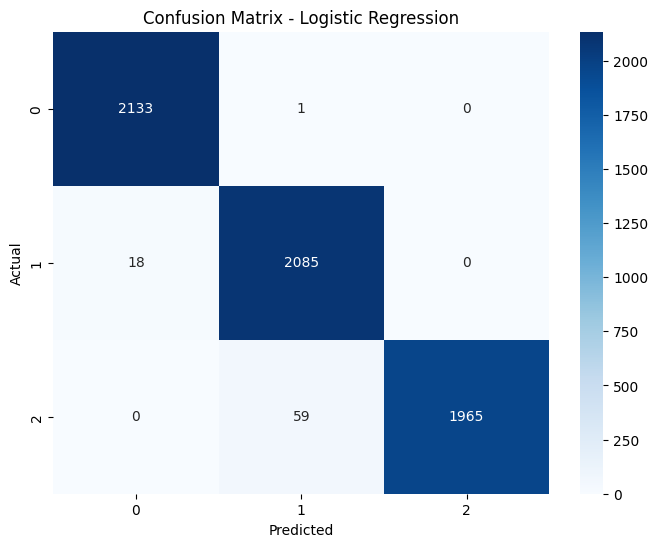

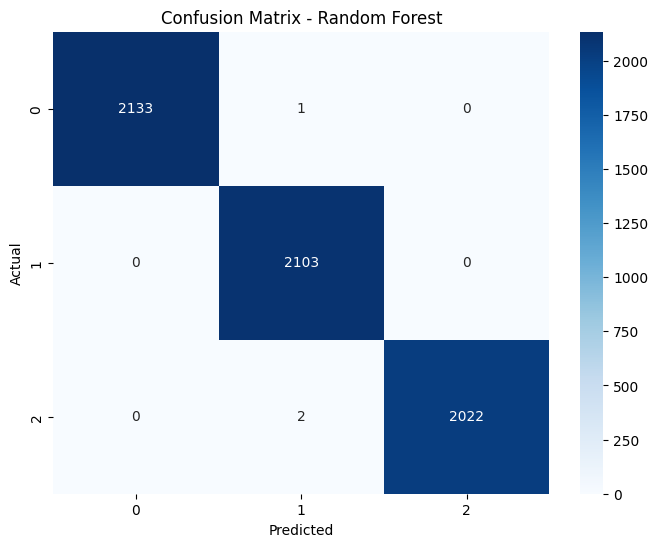

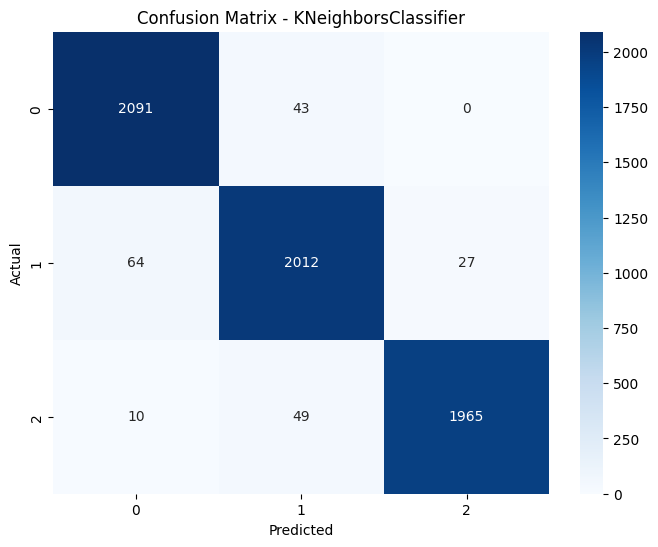

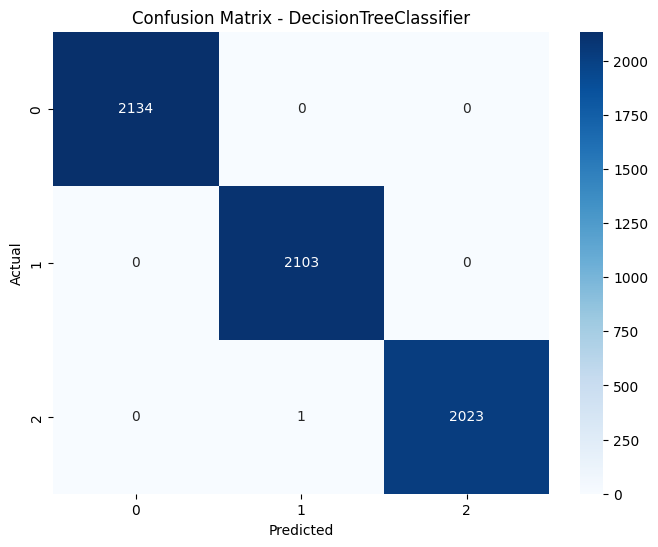

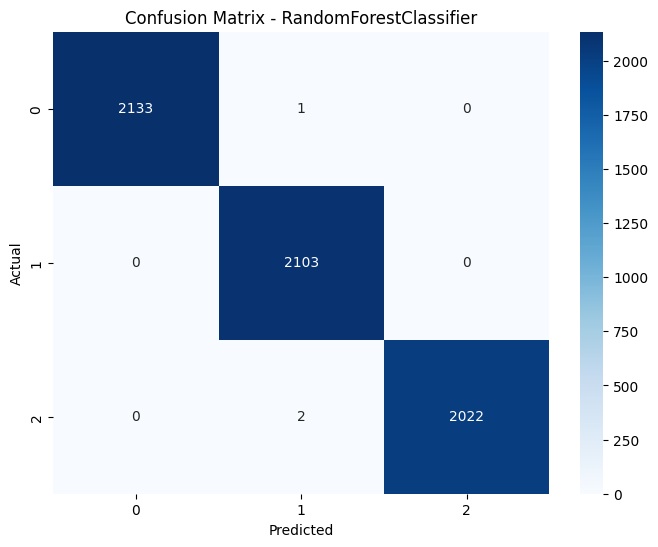

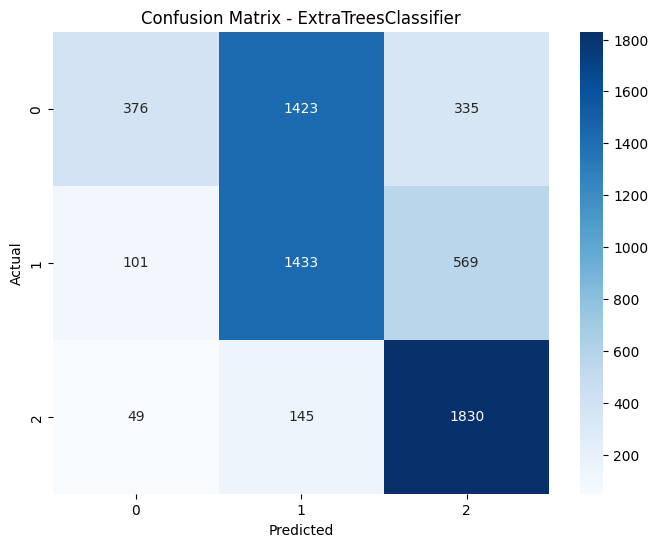

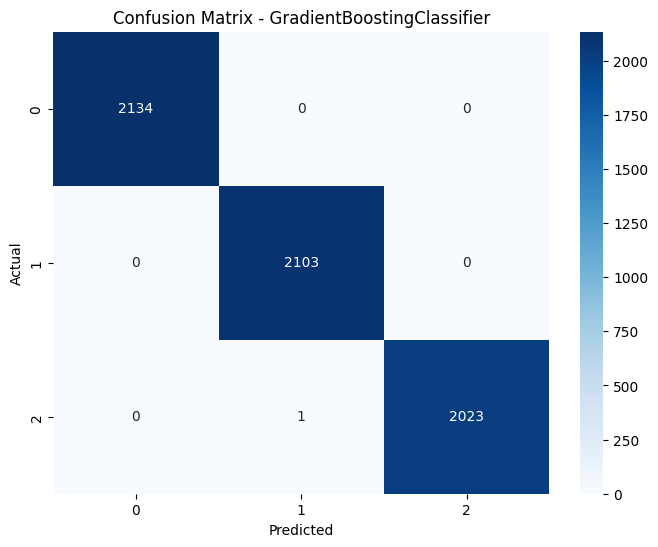

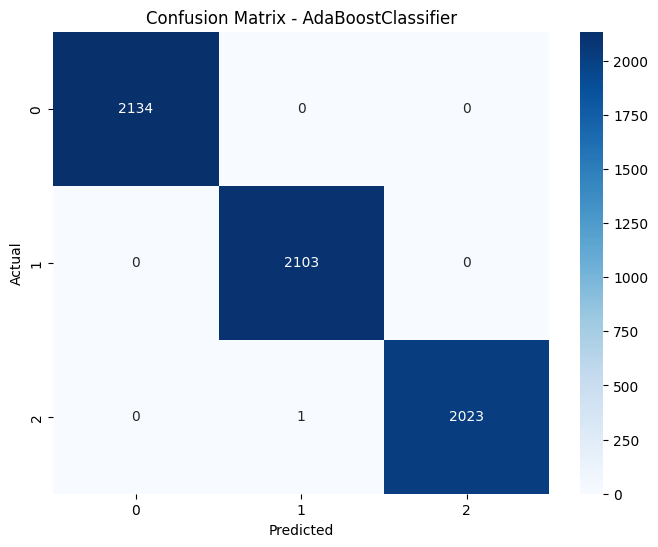

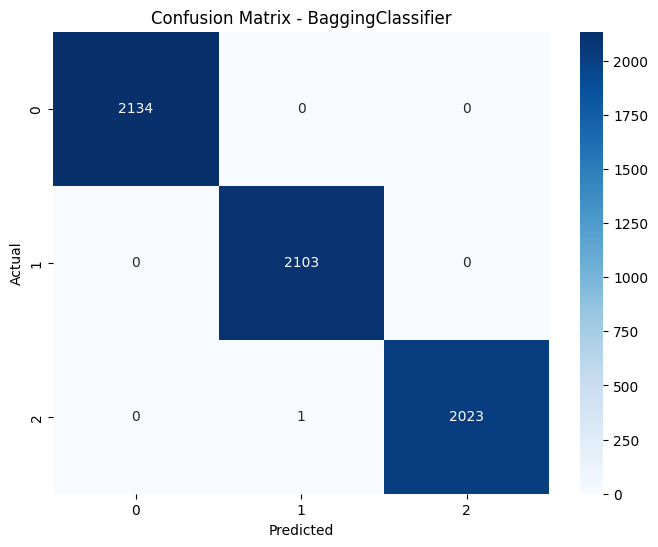

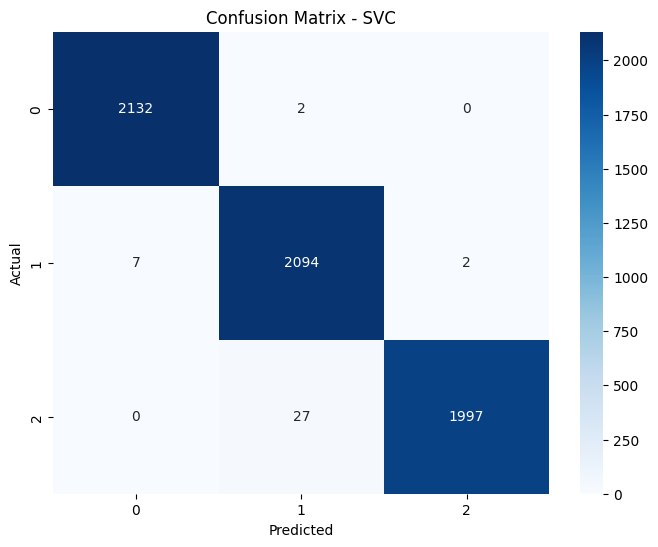

In [110]:
from sklearn.metrics import accuracy_score
import functions_pro as function

# Call function classification_models
classification_results_df = function.classification_models(X_train_scaled, y_train, X_test_scaled, y_test)

## MinMaxSscaler

In [111]:
from sklearn.preprocessing import MinMaxScaler

# Define the features and target
features = ['volatility', 'return', 'volume', 'diff_oc', 'ma_5', 'ma_10']
target = 'volatility_class'

# Split the data into features (X) and target (y)
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using MinMaxScaler
minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

# Call the classification_models function
classification_results_df = classification_models(X_train_minmax, y_train, X_test_minmax, y_test)
classification_results_df


Logistic Regression - Accuracy: 0.37102699249321197
Random Forest - Accuracy: 0.9995208433157643
KNeighborsClassifier - Accuracy: 0.9516051748921898
DecisionTreeClassifier - Accuracy: 0.9998402811052548
RandomForestClassifier - Accuracy: 0.9995208433157643
ExtraTreesClassifier - Accuracy: 0.580737901293723
GradientBoostingClassifier - Accuracy: 0.9998402811052548
AdaBoostClassifier - Accuracy: 0.9998402811052548
BaggingClassifier - Accuracy: 0.9998402811052548
SVC - Accuracy: 0.36000638875578983


## Quantile Transformer & max_depths
Notes: The QuantileTransformer from the sklearn.preprocessing module is a feature transformation tool that transforms the features to follow a uniform or normal distribution. 

In [112]:
from sklearn.preprocessing import QuantileTransformer

# Define the features and target
features = ['volatility', 'return', 'volume', 'diff_oc', 'ma_5', 'ma_10']
target = 'volatility_class'

# Split the data into features (X) and target (y)
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
# Apply Quantile Transformer
quantile_transformer = QuantileTransformer(output_distribution='normal')
X_train_quantile = quantile_transformer.fit_transform(X_train)
X_test_quantile = quantile_transformer.transform(X_test)

In [114]:
# Try the following values for max_depth
max_depths = range(1, 10)
models = {'train_score': [], 'test_score': [], 'max_depth': []}

# Loop through each value in max_depths
for depth in max_depths:
    # Fit the Random Forest with that max_depth
    clf = RandomForestClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train_quantile, y_train)

    train_pred = clf.predict(X_train_quantile)
    test_pred = clf.predict(X_test_quantile)

    # Calculate the balanced accuracy scores
    train_score = balanced_accuracy_score(y_train, train_pred)
    test_score = balanced_accuracy_score(y_test, test_pred)

    # Append the scores to the lists within the models dictionary
    models['train_score'].append(train_score)
    models['test_score'].append(test_score)
    models['max_depth'].append(depth)

In [115]:
# Create a dataframe from the models dictionary with max_depth as the index
models_df = pd.DataFrame(models).set_index('max_depth')

# Fit the model with the best max_depth
clf = RandomForestClassifier(max_depth=6, random_state=42)
clf.fit(X_train_quantile, y_train)

train_pred = clf.predict(X_train_quantile)
test_pred = clf.predict(X_test_quantile)

# Print the train and test balanced accuracy scores
print(balanced_accuracy_score(y_train, train_pred))
print(balanced_accuracy_score(y_test, test_pred))

1.0
0.9995144180487076


<Axes: xlabel='max_depth'>

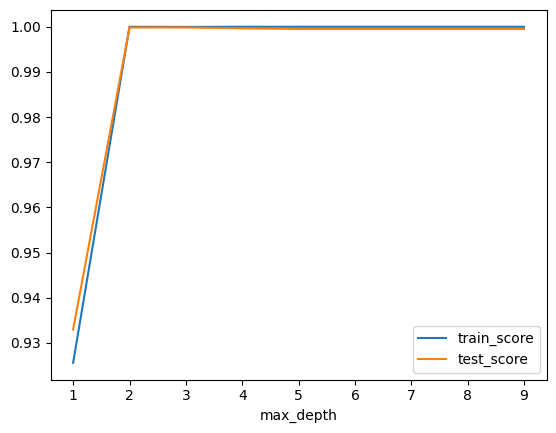

In [116]:
# Plot the results
models_df.plot()